# Homework 7: $k$-Nearest Neighbors and $k$-Means Clustering

Practical Assignment Objectives:
- Implement the $k$-Nearest Neighbors algorithm from scratch in order to classify and predict data
- To implement the $k$-Means algorithm from scratch in order to cluster data.

We use as reference the chapter 19 and 22 of Understanding Machine Learning.

Copy this notebook and insert the corresponding names on the file.


## Important!


1.   **You shall send this TP by mail with the subject: [HW7][Student_1]_[Student_2]** (Adapt the subject accordingly to your specific situation).

2.   **This exercise can be done in pairs. Please, leave all of your answers on this notebook, which will be the only file you will have to deliver.**

3. **You have one week to deliver the homework.**

4. **Comment your code. If you leave an algorithm unfinished or you believe it may have a problem handling specific cases, we will consider this for evaluation.**

5. **We strongly encourage discussion between students as long as you own your solution. Copy pasting the solution from internet/colleagues will not be tolerated.**


**Send your solutions to both mails:**

<code>breno.skuk@gmail.com<br>
julien.beguinot@telecom-paris.fr</code>

(Feel free to send an email if you have any question concerning the TP)

**Good luck!**

# Working with the $k$-NN algorithm

The $k$-Nearest-Neighbor algorithm (or, shortly, $k$-NN) is a supervised classification algorithm. It works as follows: given a data set $S^m$, an integer $1\leq k\leq m$, and a new sample $\mathbf{x}$, consider the set
$S_k(\mathbf{x})$ whose elements are the $k$ elements of $S^m$ that are the closest to $\mathbf{x}$---this implicitly assumes the existence of a metric, for instance the Euclidean distance. The label assigned to $\mathbf{x}$ is majority label in $S_k(\mathbf{x})$. Figure 1 illustrates this label assignment for three classes.

<img src="https://i.ibb.co/R7DMvxM/Figure-1.png" alt="Figure-1" border="0">

# Working with $k$-Means Clustering
The k-Means Clustering is one of the most popular machine learning algorithms for cluster analysis in data mining. The $k$-Means algorithm is an unsupervised learning algorithm that aims to group "similar" items into $k$ groups. Figure 2 illustrates k-Means with 3 classes.

Given a (training) data set and a distance metric, the algorithm starts from $k$ points in the data domain (the centroids). These $k$ points are typically randomly chosen. Each data point is assigned to the closest centroid. This gives $k$ family of points labelled by their centroids. The centroids are updated to the cluster center of each family. Repeat these steps until convergence is achieved, or up to a maximum number of iterations, or when the difference between the old and the new centroids is negligible.

<img src="https://i.ibb.co/R7t1ykM/skhjfysqjflzjdfhzef.png" alt="skhjfysqjflzjdfhzef" border="0">

*K-Means algorithm.*

<img src="https://i.ibb.co/njwxhNj/Figure-2.png" alt="Figure-2" border="0">


# Theoretical Question

Show that the definition of the centroid here is the one that minimizes the intra-class variance i.e. that minimizes the L2 norms of the points of a class
to its centroid ?

What if we change the L2 norm by the L1 norm ? What would be the correct definition of the centroid for the L1 norm in 1D ?


# Part 1: Implementation and synthetic data

## 1. Toy data set
In this part we will implement the $k$-NN algorithm for classification and the $k$-Means algorithm for clustering.

Consider a data set $\{(\mathbf{x}(n), y(n))\}_{n=1}^{300}$ consisting of 300 points $\mathbf{x}(n) = (x_1(n), x_2(n)) \in \mathbb{R}^2$, and their labels $y(n) \in \{0, 1, 2\}$ generated as follows:

→ The first 100 points have label $y(n) = 0$ and are generated according to a Gaussian distribution $\mathbf{x}(n) \sim \mathcal{N}([-1, 0], \sigma^2\mathbf{I})$

→ the next 100 points have label $y(n) = 1$ and are generated according to a Gaussian distribution $\mathbf{x}(n) \sim \mathcal{N}([1, 0], \sigma^2\mathbf{I})$

→ and the remaining 100 points have label $y(n) = 2$ and are generated according to a Gaussian distribution $\mathbf{x}(n) \sim \mathcal{N}([0, 1], \sigma^2\mathbf{I})$.

- Shuffle and split the data set into a training and a test set, containing respectively $75\%$ and $25\%$ of the data set.

In [1]:
# Imports
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def genData(N, means, sigma):
  """
  Generate the data set.

  Parameters
  -----------
  `N`: Size of the data set
  `means` Mean vectors for each part, Dimension: [3 x 2]
  `sigma` Standard deviation

  Returns
  -------
  `x`: Input data, Dimension: [N x 2]
  `y`: Labels, Dimension: [N x 1]
  """
  #  Create thress type of x
  X_0 = np.random.normal(means[0], [np.sqrt(sigma), np.sqrt(sigma)], [int(N/3), 2])
  X_1 =  np.random.normal(means[1], [np.sqrt(sigma), np.sqrt(sigma)], [int(N/3), 2])
  X_2 =  np.random.normal(means[2], [np.sqrt(sigma), np.sqrt(sigma)], [int(N/3), 2])
  # Concatenate arrays along axis 0
  X = np.concatenate( (X_0, X_1, X_2), axis=0 )

  # Create an array filled with ones and another filled with zeros
  zeros_array = np.zeros([int(N/3), 1])
  ones_array = np.ones([int(N/3), 1])
  twos_array = 2*np.ones([int(N/3), 1])

  # Concatenate the arrays along axis 0 to create Y
  Y = np.concatenate((zeros_array, ones_array, twos_array), axis=0)
  return X,Y

def shuffle_data(X,Y):
    """
    Parameters:
    -----------
    X: R2 points [N x 2]
    Y: Labels [N x 1]

    Returns:
    --------
    permutated X: R2 points [N x 2]
    permutated Y: Labels [N x 1]

    """

    permutation = np.linspace(0, len(X)-1, len(X)).astype(int)
    np.random.shuffle(permutation)



    return X[permutation], Y[permutation]

def splitData(x, y, p):
  """
  Split the data set randomly into a training set and a test set.

  Parameters
  -----------
  `x`: Input data, Dimension:  [N x 2]
  `y`: Labels, Dimension: [N x 1]
  `p`: ratio of training samples

  Returns
  -------
  `xTrain`: Input data for training, Dimension: [p.N x 2]
  `yTrain`: Labels for training, Dimension: [p.N x 1]
  `xTest`: Input data for testing, Dimension: [(1-p).N x 2]
  `yTest`: Labels for testing, Dimension: [(1-p).N x 1]
  """
  ind = int(len(x)*p)
  x, y = shuffle_data(x, y)
  return x[:ind, :], y[:ind], x[ind:, :], y[ind:]

## $k$-NN algorithm for classification
### Question 1:

- Fix the variance $\sigma^2 = 0.10$ and $k=1$ and run the algorithm to classify the test set.
- In order to visualize all data set and the corresponding label, plot all generated points in a coordinate plane, and the estimated decision boundary, similarly to Figure 3.
- Perform the classification with $\sigma^2 \in \{0.10, 0.20, 0.25\}$ repeated 50 times each, with randomly generated training and test sets at each time.
- Plot the average error rate of the test data set *versus* the variance $\sigma^2$, use error bars to represent the standard deviation. Comment.

*Hint: Use* `matplotlib.pyplot.countourf` *to plot the decision boundary*

<img src="https://i.ibb.co/bgwRmT8/Screenshot-2022-10-23-165012.png" alt="Screenshot-2022-10-23-165012" border="0">

In [15]:
def knnClassifier(k, xTrain, yTrain, xTest):
  """
  Classify the test set using the training set.

  Parameters
  -----------
  `k`: kNN parameter (number of neighbors to consider)
  `xTrain`: Input data for training
  `yTrain`: Labels for training
  `xTest`: Input data for testing

  Returns
  -------
  `yPred`: Predicted Labels
  """
  d = np.linalg.norm((xTest[:, None] - xTrain), axis=2)
  ind = np.argsort(d, axis = 1)[:, :k]
  yPred = np.zeros([len(xTest), 3])
  yPred[:, 0] = (yTrain[ind] == 0).sum(1).T
  yPred[:, 1] = (yTrain[ind] == 1).sum(1).T
  yPred[:, 2] = (yTrain[ind] == 2).sum(1).T
  yPred = np.argmax(yPred, axis = 1)
  return yPred




def plotDataKNN(k, xTrain, yTrain, xTest, yTest):
  """
  Plot the data set and the decision boundaries for KNN.

  Parameters
  -----------
  `k`: kNN parameter (number of neighbors to consider)
  `xTrain`: Input data for training
  `yTrain`: Labels for training
  `xTest`: Input data for testing
  `yTest`: Labels for testing
  `yPred`: Predicted Labels
  """

  # Create a meshgrid to draw the decision boundaries
  # For each coordinate in the space, we will predict its label
  # and thus creating decision boundaries for the data points

  xMin, xMax = xTrain[:, 0].min() - 1, xTrain[:, 0].max() + 1
  yMin, yMax = xTrain[:, 1].min() - 1, xTrain[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(xMin, xMax, 0.1), np.arange(yMin, yMax, 0.1))

  XY = np.c_[xx.ravel(), yy.ravel()]  # Coordinates of the space

  # classify the coordinate with KNN
  Z = knnClassifier(k, xTrain, yTrain, XY)
  yPred = knnClassifier(k, xTrain, yTrain, xTest)

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)

  plt.figure(figsize=(10,10))
  plt.contourf(xx, yy, Z, alpha = 0.2, cmap = ListedColormap(('#f0027f', '#AAAAFF', '#FFFF00')))

  # TODO: Plot the data points, don't forget to count the wrong labeles examples seperatly
  plt.scatter( xTrain[:,0], xTrain[:,1], c=yTrain, label="Training data")

  plt.scatter( xTest[yTest.T[0]==yPred,0], xTest[yTest.T[0]==yPred,1], c=yTest[yTest.T[0]==yPred], marker="+", label="Correctly predicted data")
  plt.scatter( xTest[yTest.T[0]!=yPred,0], xTest[yTest.T[0]!=yPred,1], c=yTest[yTest.T[0]!=yPred], marker="X", label="Wrogly predicted test")

  plt.title("decision boundary")
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.legend()
  plt.show()


def l01Loss(yTest, yPred):
  """
  Calculate the L_01 Loss

  Parameters
  -----------
  `yTest`: Labels for testing
  `yPred`: Predicted Labels

  Returns:
  --------
  `loss`: Computed Loss
  """
  return (yTest.T[0] != yPred).sum()/len(yPred)

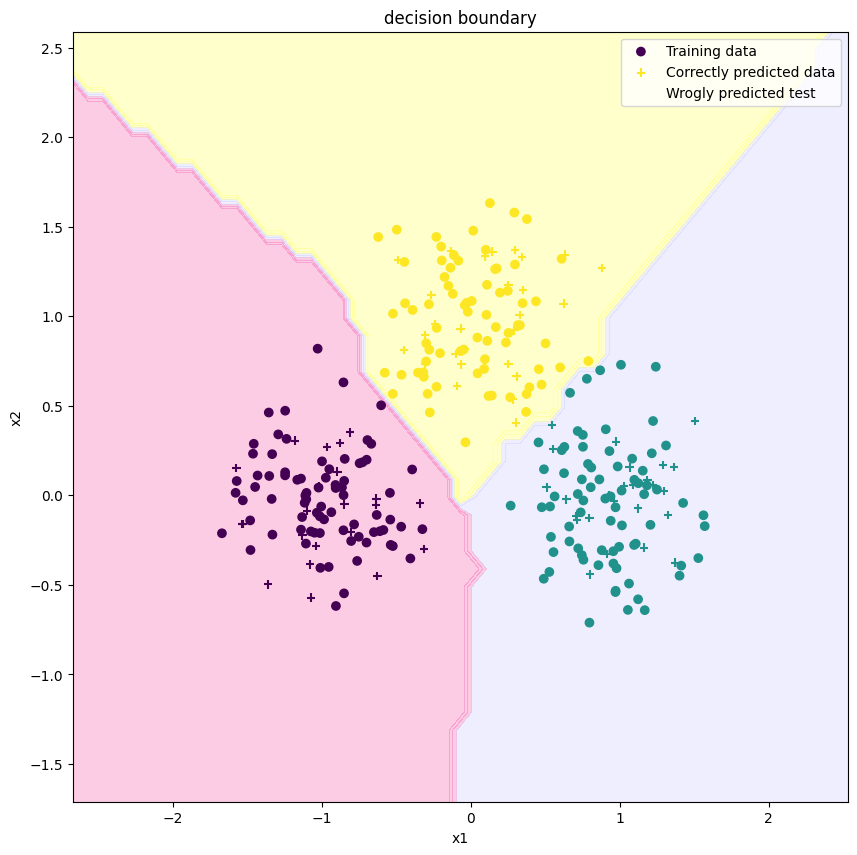

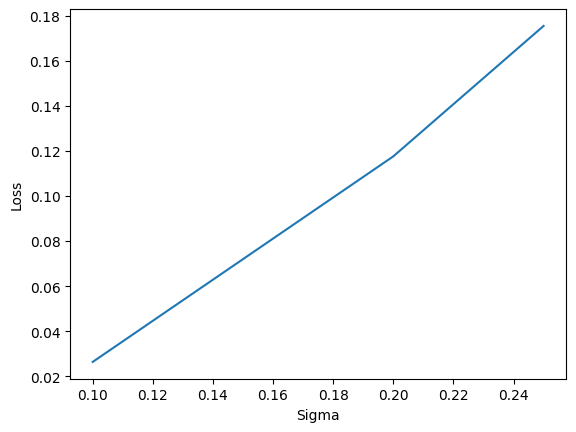

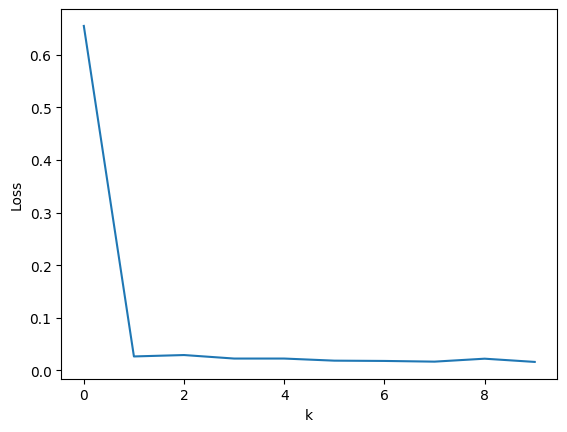

In [27]:
means = [[-1, 0],[1, 0 ],[0, 1]]
N = 300
sigma = 0.1
X, Y = genData(N, means, sigma)
xTrain, yTrain, xTest, yTest = splitData(X, Y, 0.75)


k=1
plotDataKNN(k, xTrain, yTrain, xTest, yTest)
l01Loss(yTest, knnClassifier(k, xTrain, yTrain, xTest))

loss = np.zeros([3, 1])
for si, s in enumerate([0.1, 0.2, 0.25]):
  for i in range(50):
    sigma = s
    X, Y = genData(N, means, sigma)
    xTrain, yTrain, xTest, yTest = splitData(X, Y, 0.75)
    yPred = knnClassifier(k, xTrain, yTrain, xTest)
    loss[si] += l01Loss(yTest, yPred)

plt.figure()
plt.plot([0.1, 0.2, 0.25], loss/50)
plt.xlabel("Sigma")
plt.ylabel("Loss")
plt.show()

loss = np.zeros([10, 1])
s = 0.1
for ki, k in enumerate(range(10)):
  for i in range(50):
    sigma = (s)
    X, Y = genData(N, means, sigma)
    xTrain, yTrain, xTest, yTest = splitData(X, Y, 0.75)
    yPred = knnClassifier(k, xTrain, yTrain, xTest)
    loss[ki] += l01Loss(yTest, yPred)

plt.figure()
plt.plot(range(10), loss/50)
plt.xlabel("k")
plt.ylabel("Loss")

plt.show()



In [5]:
#The loss decrease as k augments, which logical, the more data you rely on to find the true label the more precise you are.
#As well the loss increase with sigma since the data become more mixed up and less easy to delimitate

We use here **K-Fold Cross Validation**, a technique used for model validation.

Suppose we are given $N$ (classification) models $h_i \in \mathcal{H}, i=\{1, \cdots, N\}$, a training set $(\mathbf{x}_{train}, y_{train})$, and a test set $(\mathbf{x}_{test}, y_{test})$.

Split the training set $(\mathbf{x}_{train}, y_{train})$ into $k$ folds, use $(k-1)$ folds to train and one fold to validate. Cycle through all folds, as shown in Figure 4, where we consider a different fold for testing at each cycle. For each model we report the average error of the $k$ folds.

The selected model is the one with the smallest average error:

$$ h_{best} = \arg\min_{h_i \in \mathcal{H}} \frac{1}{k} \sum^{k}_{j=1}err(y_{valid}^{(j)}, \hat{y}_{valid}^{(j)}) \quad  i=\{1, \cdots, N\}$$

Once the model is selected, it is trained with the entire training set (with the validation part) $(\mathbf{x}_{train}, y_{train})$, and tested over the test data $(\mathbf{x}_{test}, y_{test})$.

<img src="https://i.ibb.co/KKWPLgk/1-AAw-Il-HM8-Tp-AVe4l2-Fih-NUQ.png" alt="1-AAw-Il-HM8-Tp-AVe4l2-Fih-NUQ" border="0" width=500>

*Figure 4: Visualization of the K-Fold Cross Validation training data splitting*





### Question 2:
With $\sigma^2 = 0.10$ and $5$ folds for the Cross Validation:
- Generate the dataset as in question 1, with a 75/25 training/test proportion.
- Compute the average error for each $k$-NN model, $k\in\{1,2,\ldots, 5\} $ (these are the "validation error" for each $k$). Plot the validation error as a function of $k$. Comment.
- Fit the best model on the entire training set and compute its error on the test set (plot the generated points as in question 1). Compare this error with validation error of the best model.
- Is there a better configuration of the number of folds to consider (e.g. $9$ or $15$ folds) ?

*Hint: Use* `sklearn.model_selection.KFold` *to split data.*

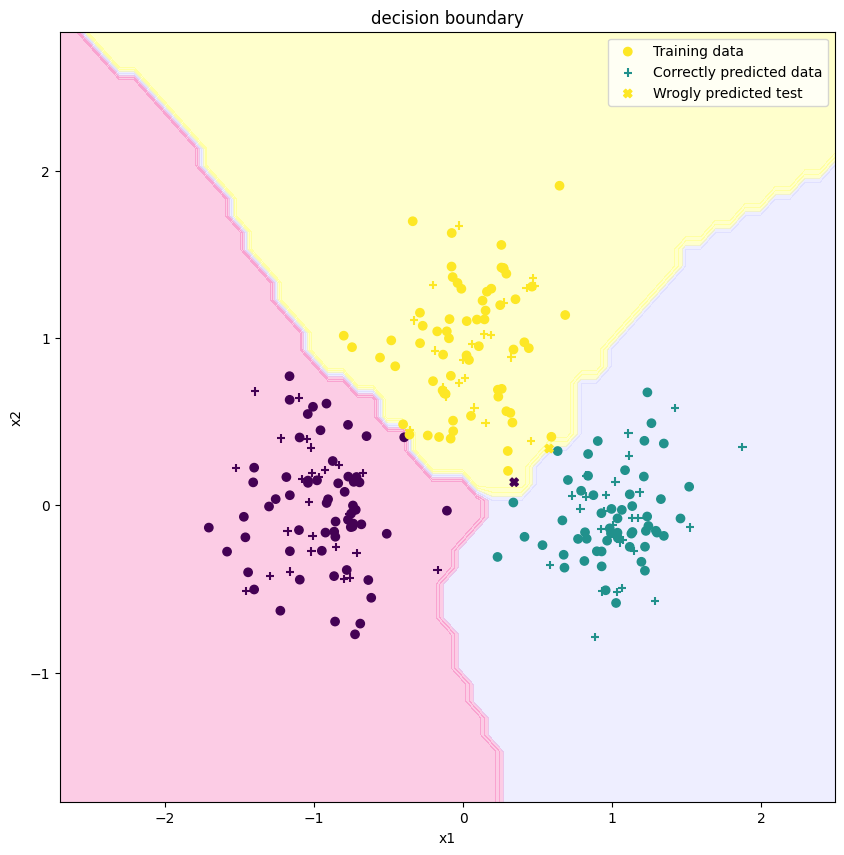

0.02666666666666667


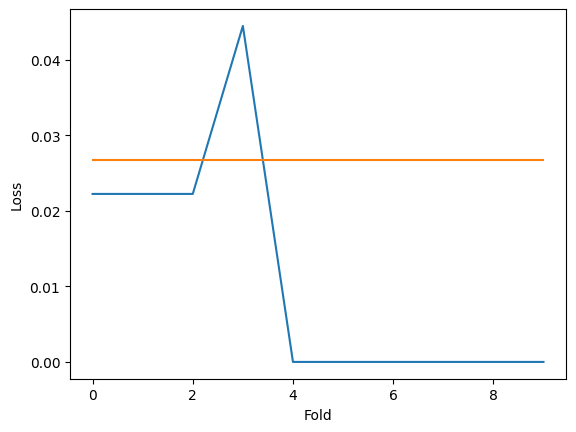

In [28]:
from sklearn.model_selection import KFold
folds=10
kf = KFold(n_splits=K)
kf.get_n_splits(X)

means = [[-1, 0],[1, 0 ],[0, 1]]
N = 300
sigma = 0.1
X, Y = genData(N, means, sigma)
xTrain, yTrain, xTest, yTest = splitData(X, Y, 0.75)
k=1

mini_loss = 1000

loss = np.zeros([folds, 1])


for j, (train_index, val_index) in enumerate(kf.split(xTrain)):


  loss[j] = l01Loss(yTrain[val_index], knnClassifier(k, xTrain[train_index], yTrain[train_index], xTrain[val_index]))
  if loss[j] < mini_loss:
    tind = train_index



yPred = knnClassifier(k, xTrain[tind], yTrain[tind], xTest)
plotDataKNN(k, xTrain[tind], yTrain[tind], xTest, yTest)

print(l01Loss(yTest, yPred))
plt.figure()
plt.plot(range(folds), loss)
plt.plot(range(folds), [l01Loss(yTest, knnClassifier(k, xTrain, yTrain, xTest))]*folds)
plt.xlabel("Fold")
plt.ylabel("Loss")
plt.show()




Global loss on best model decrease when the number of fold icrease beacause there is more data in the trai dataset

## $k$-Means algorithm for clustering


### Question 3
Generate the data set with the same function from Question 2 with $\sigma^2 = 0.15$.

- Group the data set into three clusters $(k=3)$ using the $k$-Means algorithm with respect to the Euclidean distance.
- Repeat it with $k \in \{2, 4, 6\}$.
- Visualize all data set and the centroids at the convergence for each $k$. Comment.

In [73]:
from os import kill
def kMeans(k, x):
  """
  k-Means Clustering of the data set with k centroids

  Parameters
  -----------
  `k`: k-Means parameter (Number of centroids)
  `x`: Input data

  Returns
  -------
  `centroids`: Coordinates of the centroids
  `labels`: Assigned clusters for each data point
  """
  ind = np.random.choice(range(len(x)), k) # Randomly select k indices for the initial centroids
  centroids = x[ind]
  old_c = centroids
  d = np.linalg.norm((x[:, None] - centroids), axis=2)
  converged = False

  labels = d.argmin(axis = 1)

  while not converged:
    d = np.linalg.norm((x[:, None] - centroids), axis=2)
    labels = d.argmin(axis = 1)
    for ki in range(k):
      centroids[ki] = x[labels == ki].mean(0)
    if np.linalg.norm((old_c - centroids)) < 1e-4:
      converged = True

    old_centroids = centroids


  d = np.linalg.norm((x[:, None] - centroids), axis=2)
  labels = d.argmin(axis = 1)

  return centroids, labels


def plotDataKMeans(x, y, labels, centroids):
  """
  Plot the data set, visualize the clusters and the centroids

  Parameters
  -----------
  `k`: k-Means parameter (Number of centroids)
  `labels`: Assigned clusters for each data point
  `centroids`: Coordinates of the centroids
  """
  xMin, xMax = x[:, 0].min() - 1, x[:, 0].max() + 1
  yMin, yMax = x[:, 1].min() - 1, x[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(xMin, xMax, 0.1), np.arange(yMin, yMax, 0.1))

  XY = np.c_[xx.ravel(), yy.ravel()]  # Coordinates of the space

  # classify the coordinate with KNN

  d = np.linalg.norm((XY[:, None] - centroids), axis=2)
  Z = d.argmin(axis = 1)

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)

  plt.figure(figsize=(10,10))
  plt.contourf(xx, yy, Z, alpha = 0.2, cmap = "plasma")

  # TODO: Plot the data points, don't forget to count the wrong labeles examples seperatly
  plt.scatter( x[:,0], x[:,1], c=y, label="Data")

  plt.scatter( centroids[:,0], centroids[:,1], marker="X", label="Centroids")

  plt.title("decision boundary")
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.legend()
  plt.show()

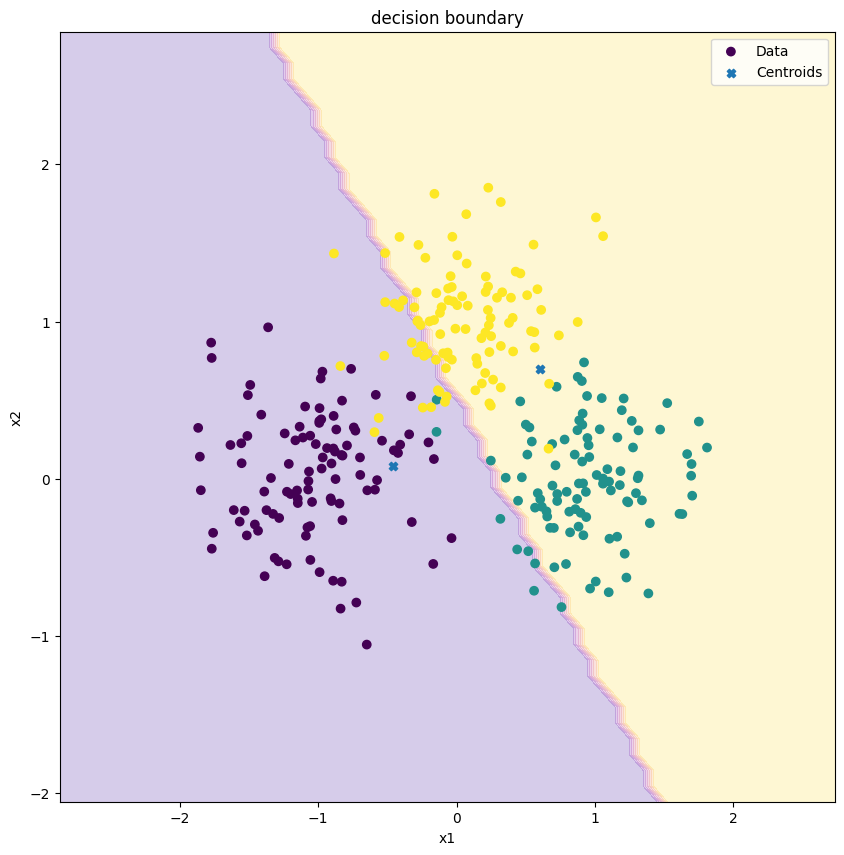

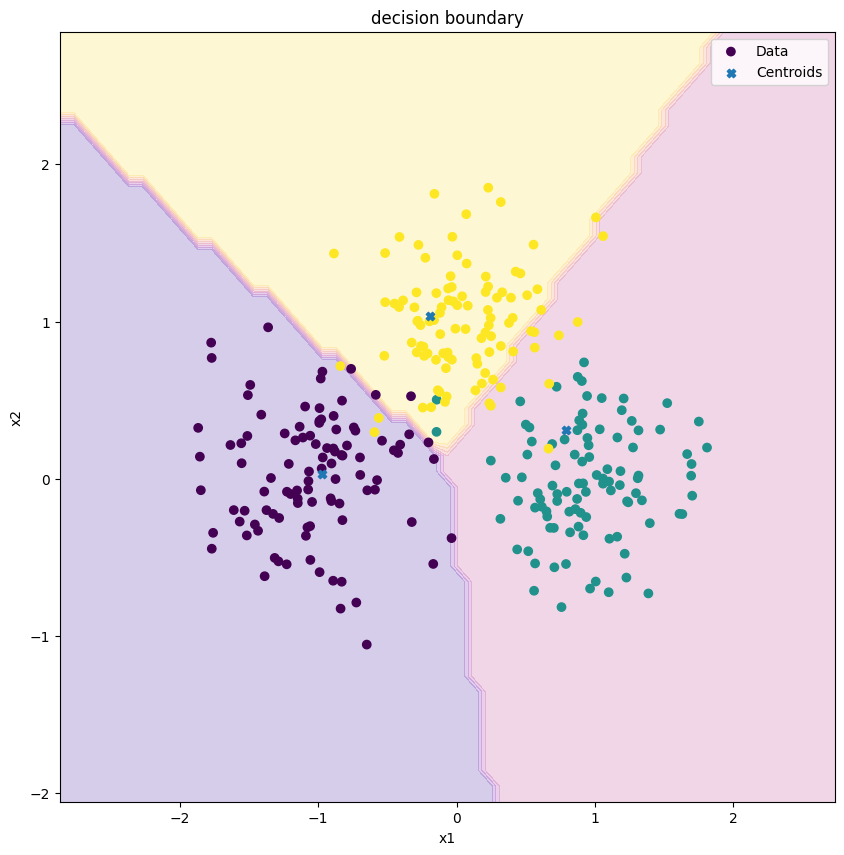

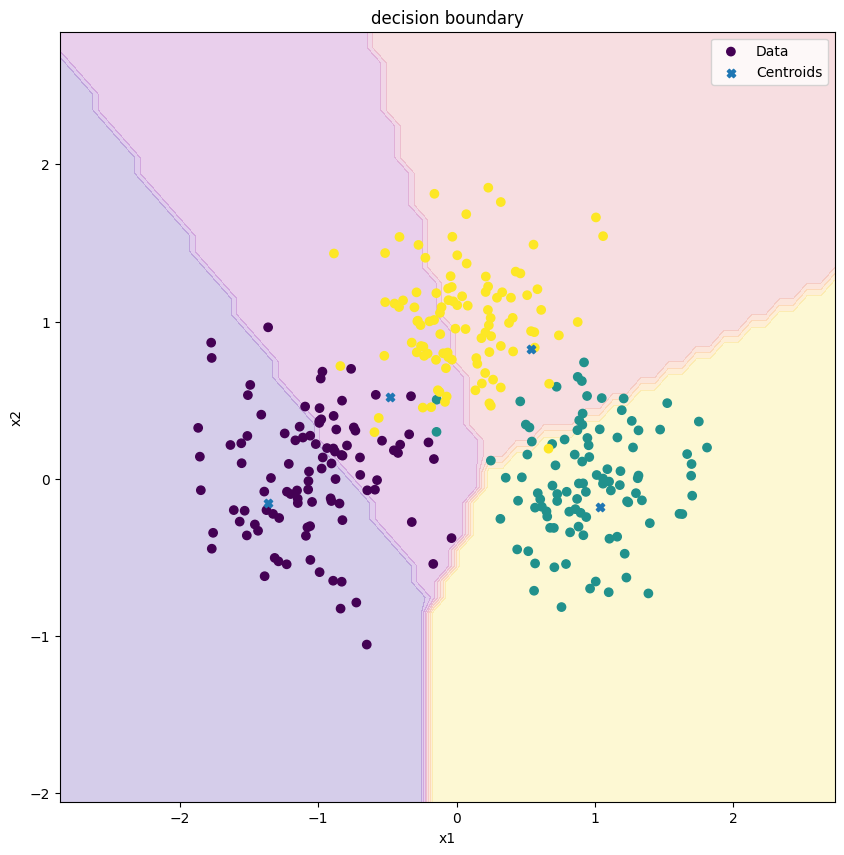

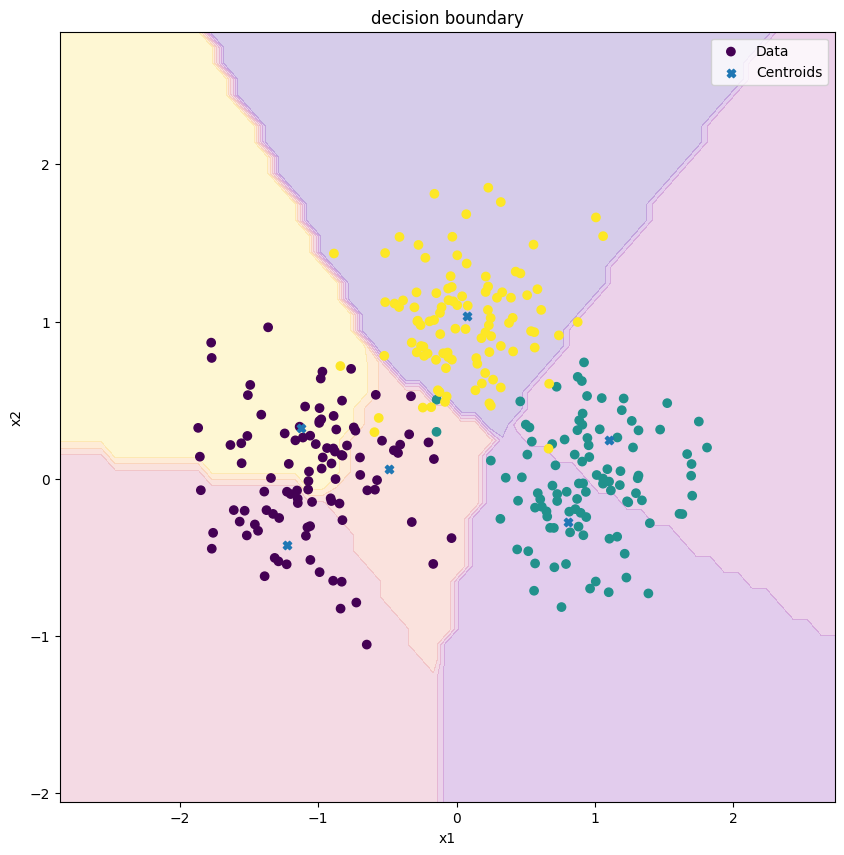

In [74]:
means = [[-1, 0],[1, 0 ],[0, 1]]
N = 300
sigma = 0.15
X, Y = genData(N, means, sigma)

k=[2, 3, 4, 6]

for ki in k:
  c, yPred = kMeans(ki, X)
  plotDataKMeans(X, Y, yPred, c)

The data is well divided ito 3 distinct cluster whe k = 3 but we can see that it is very sensible to the number of cluster ad the initial value taken.

### Question 4
- Generate the data set with $\sigma^2 \in \{0.10, 0.25, 0.50\}$.
- For each $\sigma^2$, group the data set into three clusters $(k=3)$ using the $k$-Means algorithm with respect to the Euclidean distance.
- Visualize all data with the centroids that generated the input data, i.e. $\{(-1, 0), (1, 0), (0, 1)\}$ for each $\sigma^2$. Comment.

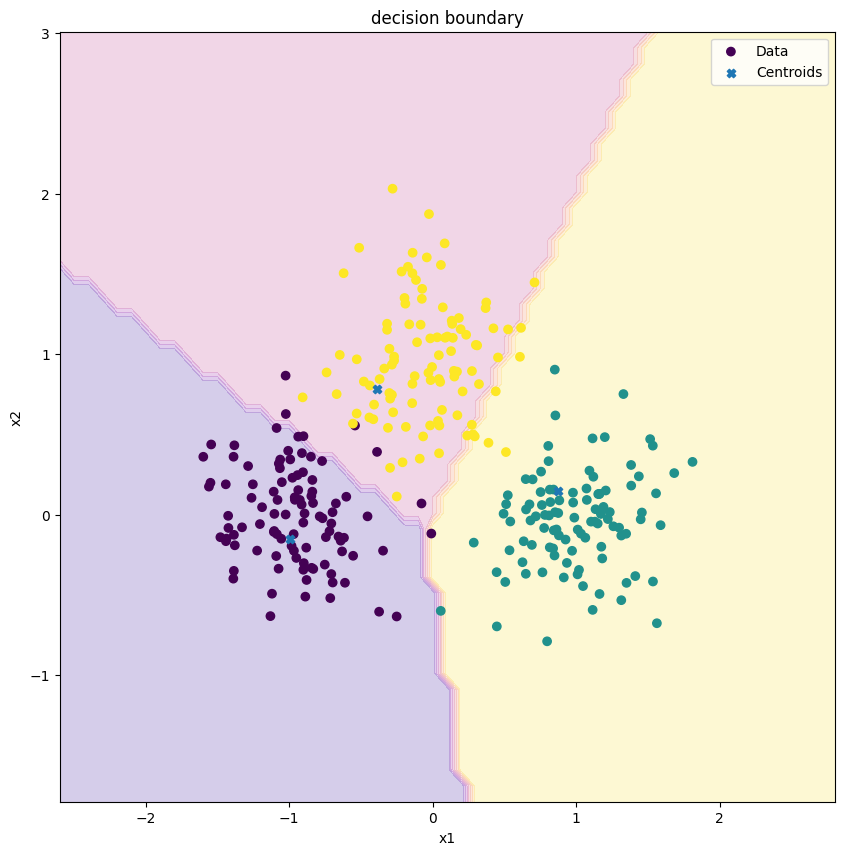

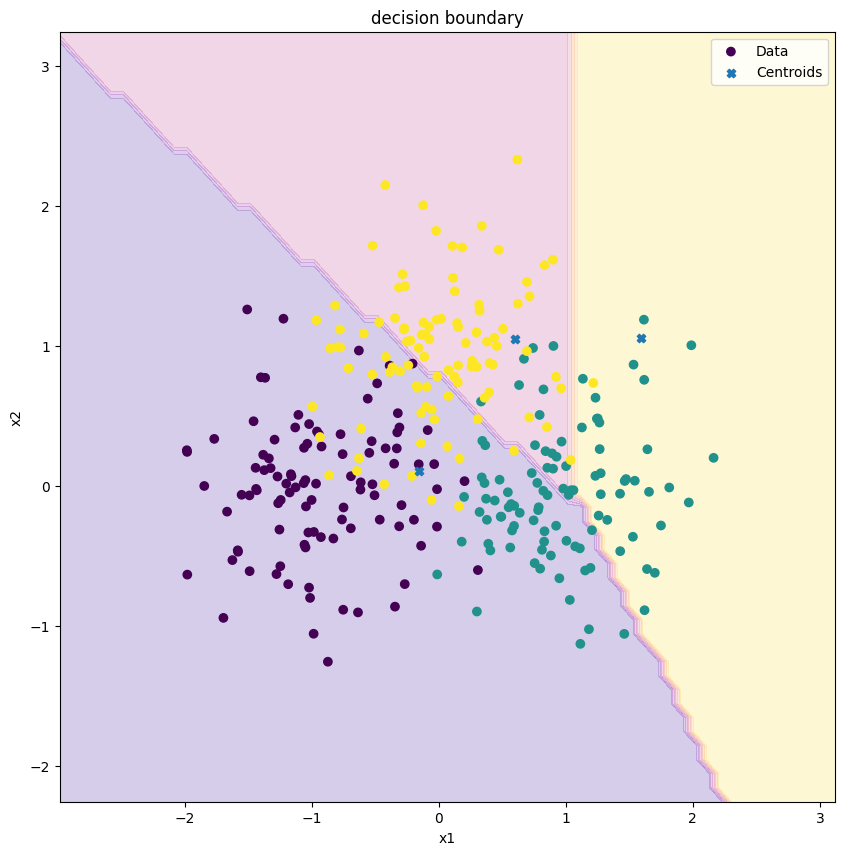

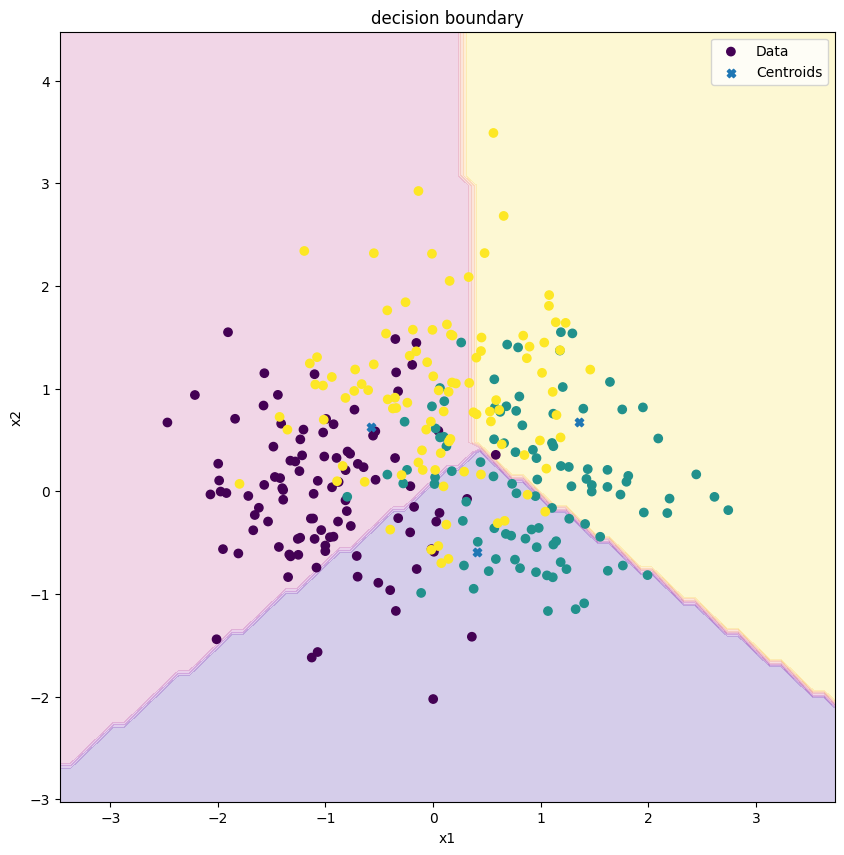

In [80]:
means = [[-1, 0],[1, 0 ],[0, 1]]
N = 300
sigma = [0.1, 0.25, 0.5]


k=3

for si in sigma:
  X, Y = genData(N, means, si)
  c, yPred = kMeans(k, X)
  plotDataKMeans(X, Y, yPred, c)

The bigger the variance, the more the data is mixed up ad cannot be separate inot three distinct cluster, thus it works less good whe sigma increase for the same mean data

# Part 2: Real data

## $k$-NN regression : Szefed-weather data-set
In this part we will apply the k-NN algorithm for prediction.

Let’s use the Szeged-weather data set that can be downloaded in <code>https://www.kaggle.com/budincsevity/szeged-weather/data</code>.

We want to predict the apparent temperature given humidity and temperature. Apparent temperature is a notion of temperature that reflects human perception.

**Short description:** The Szeged-weather data set set is a daily/hourly summary for Szeged, Hungary area, between $2006$ and $2016$, in terms of temperature, humidity, apparent temperature, pressure, wind speed, among other measurements.

**Data Preparation:** For simplicity we will consider only three attributes: apparent temperature, humidity, and temperature, and only the first $2000 $ samples of the data set. We will use K-Fold Cross Validation with $5$ folds.

### Question 5:
Visualize all data set in terms of temperature (x-axis), humidity (y-axis), and apparent temperature (color). You should obtain a figure similar to Figure 5a.

<img src="https://i.ibb.co/zrksRTq/Screenshot-2022-10-23-164818.png" alt="Screenshot-2022-10-23-164818" border="0">

*Figure 5: Visualization of three attributes of the Szeged-weather data set: (a) shows all data set and (b) shows only the first 2000 samples of the data set.*

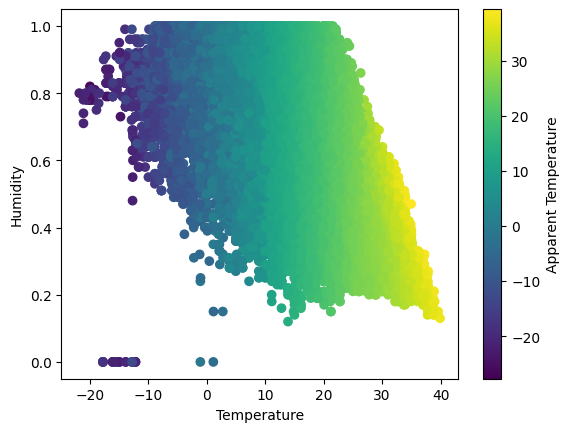

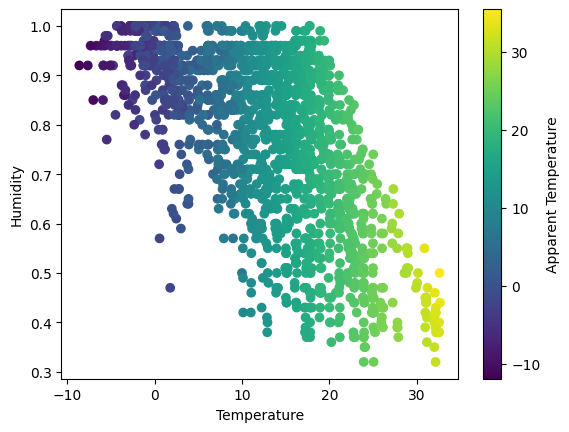

In [90]:
from google_drive_downloader import GoogleDriveDownloader as gdd
import pandas as pd
gdd.download_file_from_google_drive(file_id='1NO5fOYI50i9tQl_hrHgY9z3au9me6zJq',
                                    dest_path='./weather/weatherHistory.csv')

data = pd.read_csv('./weather/weatherHistory.csv')
temperature = data['Temperature (C)']
humidity = data['Humidity']
a_temperature = data['Apparent Temperature (C)']

plt.figure()
sc = plt.scatter(temperature, humidity, c=a_temperature)
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.colorbar(sc, label='Apparent Temperature')
plt.show()

plt.figure()
sc = plt.scatter(temperature[:2000], humidity[:2000], c=a_temperature[:2000])
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.colorbar(sc, label='Apparent Temperature')
plt.show()

### Question 6:
- Consider the first $2000$ samples of the data set, and plot them. You should get Figure 5b.
- The prediction, given by the $k$-NN algorithm, is computed by taking into account the average of the values of $k$ nearest neighbors. Predict the apparent temperature given humidity and temperature using the $k$-NN algorithm with respect to the Euclidean distance for $k = 1$.
- Compute the mean squared error of the test data set.

In [115]:
def knnRegressor(k, xTrain, yTrain, xTest):
  """
  Prediction with KNN

  Parameters
  -----------
  `k`: kNN parameter (number of neighbors to consider)
  `xTrain`: Input data for training
  `yTrain`: True Values for training
  `xTest`: Input data for testing

  Returns
  -------
  `yPred`: Predicted Values
  """
  d = np.linalg.norm((xTest[:, None] - xTrain), axis=2)
  ind = np.argsort(d, axis = 1)[:, :k]
  yPred = np.zeros([len(xTest), 3])
  yPred = yTrain[ind].mean(1)

  return yPred


Mean square error: 1.3412712962962963


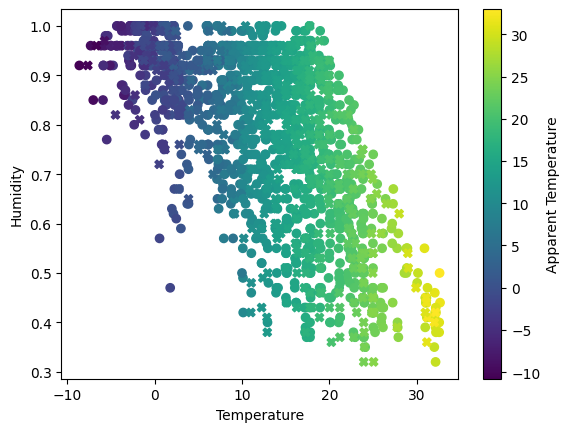

In [118]:
means = [[-1, 0],[1, 0 ],[0, 1]]
N = 300
k = 1


X = np.concatenate((np.array(temperature)[:2000, None], np.array(humidity)[:2000, None]), axis = 1)
Y = np.array(a_temperature)[:2000, None]

xTrain, yTrain, xTest, yTest = splitData(X, Y, 0.75)
yPred = knnRegressor(k, xTrain, yTrain, xTest)

mse = ((yPred - yTest)**2).sum()/len(yPred)
print("Mean square error:", mse)

plt.figure()
sc = plt.scatter(xTrain[:, 0], xTrain[:, 1], c=yTrain)
sc = plt.scatter(xTest[:, 0], xTest[:, 1], c=yPred, marker="X")
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.colorbar(sc, label='Apparent Temperature')
plt.show()


### Question 7:
- Perform K-Fold Cross Validation with $5$ Folds with different numbers of neighbors $k \in \{1, 3, 5, 7, 10, 15\}$, and showcase the best model.
- Plot the mean squared error of the test data set *versus* the parameter $k$, use error bars to represent the standard deviation of the error for each model. Comment.

In [13]:
# Question 7's answers

---
# Comments of the students:

To improve the experience of students that will take the course on the future any thoughtful comment or suggestion will be much appreciated!

**Comments:**

# Some References:

https://www.youtube.com/watch?v=09mb78oiPkA : $k$-NN

https://www.youtube.com/watch?v=hDmNF9JG3lo : $k$-Means

https://www.youtube.com/watch?v=uoTBdCODGvk : Model Selection and Cross Validation

https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/ : Numpy Broadcasting and Vectorization